In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# The dataset
This dataset contains the data on economy of five BRICS nations (Brazil, Russian Federation, India, China, South Africa)  
Annual data is present for different economic facets from 1970- 2019

In [2]:
# Reading the dataset
eco = pd. read_csv('../BRICS Development Indicators/Economy_Data.csv', sep=';')
eco.head()

,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
0,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,Brazil,BRA,1970.0,NaN
1,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,China,CHN,1970.0,NaN
2,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,India,IND,1970.0,NaN
3,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,Russian Federation,RUS,1970.0,NaN
4,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,South Africa,ZAF,1970.0,NaN


In [3]:
# Looking for missing values and data types
eco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86500 entries, 0 to 86499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SeriesName   86350 non-null  object 
 1   SeriesCode   86250 non-null  object 
 2   CountryName  86250 non-null  object 
 3   CountryCode  86250 non-null  object 
 4   Year         86500 non-null  float64
 5   Value        60348 non-null  float64
dtypes: float64(2), object(4)
memory usage: 4.0+ MB


In [4]:
# Value column had missing data. Droping rows with missing values
eco.drop(eco[eco['Value'].isna()].index, inplace=True)
eco.isna().sum()


SeriesName     0
SeriesCode     0
CountryName    0
CountryCode    0
Year           0
Value          0
dtype: int64

In [5]:
# Converting Year values to datetime format
eco['Year'] = pd.to_datetime(eco['Year'], format='%Y').dt.year
eco.head()

,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
5,Adjusted net national income (constant 2010 US$),NY.ADJ.NNTY.KD,Brazil,BRA,1970,3.918974e+11
7,Adjusted net national income (constant 2010 US$),NY.ADJ.NNTY.KD,India,IND,1970,1.915335e+11
10,Adjusted net national income (current US$),NY.ADJ.NNTY.CD,Brazil,BRA,1970,3.786021e+10
11,Adjusted net national income (current US$),NY.ADJ.NNTY.CD,China,CHN,1970,8.525561e+10
12,Adjusted net national income (current US$),NY.ADJ.NNTY.CD,India,IND,1970,5.776720e+10


# The Data
There are 332 different categories of economic data.  
Data in each category is collected annual from 1970 to 2019

In [6]:
print(eco['SeriesName'].nunique(), 'in SeriesName column')
#eco['SeriesName'].unique()

332 in SeriesName column


In [7]:
#eco['SeriesName'].unique()

# Annual %growth in different sectors
- Agriculture, forestry, and fishing, 
- Exports of goods and services 
- Imports of goods and services 
- Industry (including construction)
- Manufacturing
- Services

In [8]:
eco[eco['SeriesName'].str.contains('annual %', case=True)]['SeriesName'].unique()

array(['Agriculture, forestry, and fishing, value added (annual % growth)',
       'Exports of goods and services (annual % growth)',
       'Final consumption expenditure (annual % growth)',
       'GDP growth (annual %)', 'GDP per capita growth (annual %)',
       'General government final consumption expenditure (annual % growth)',
       'GNI growth (annual %)', 'GNI per capita growth (annual %)',
       'Gross capital formation (annual % growth)',
       'Gross fixed capital formation (annual % growth)',
       'Households and NPISHs Final consumption expenditure (annual % growth)',
       'Households and NPISHs Final consumption expenditure per capita growth (annual %)',
       'Imports of goods and services (annual % growth)',
       'Industry (including construction), value added (annual % growth)',
       'Manufacturing, value added (annual % growth)',
       'Services, value added (annual % growth)',
       'Adjusted net national income (annual % growth)',
       'Adjusted ne

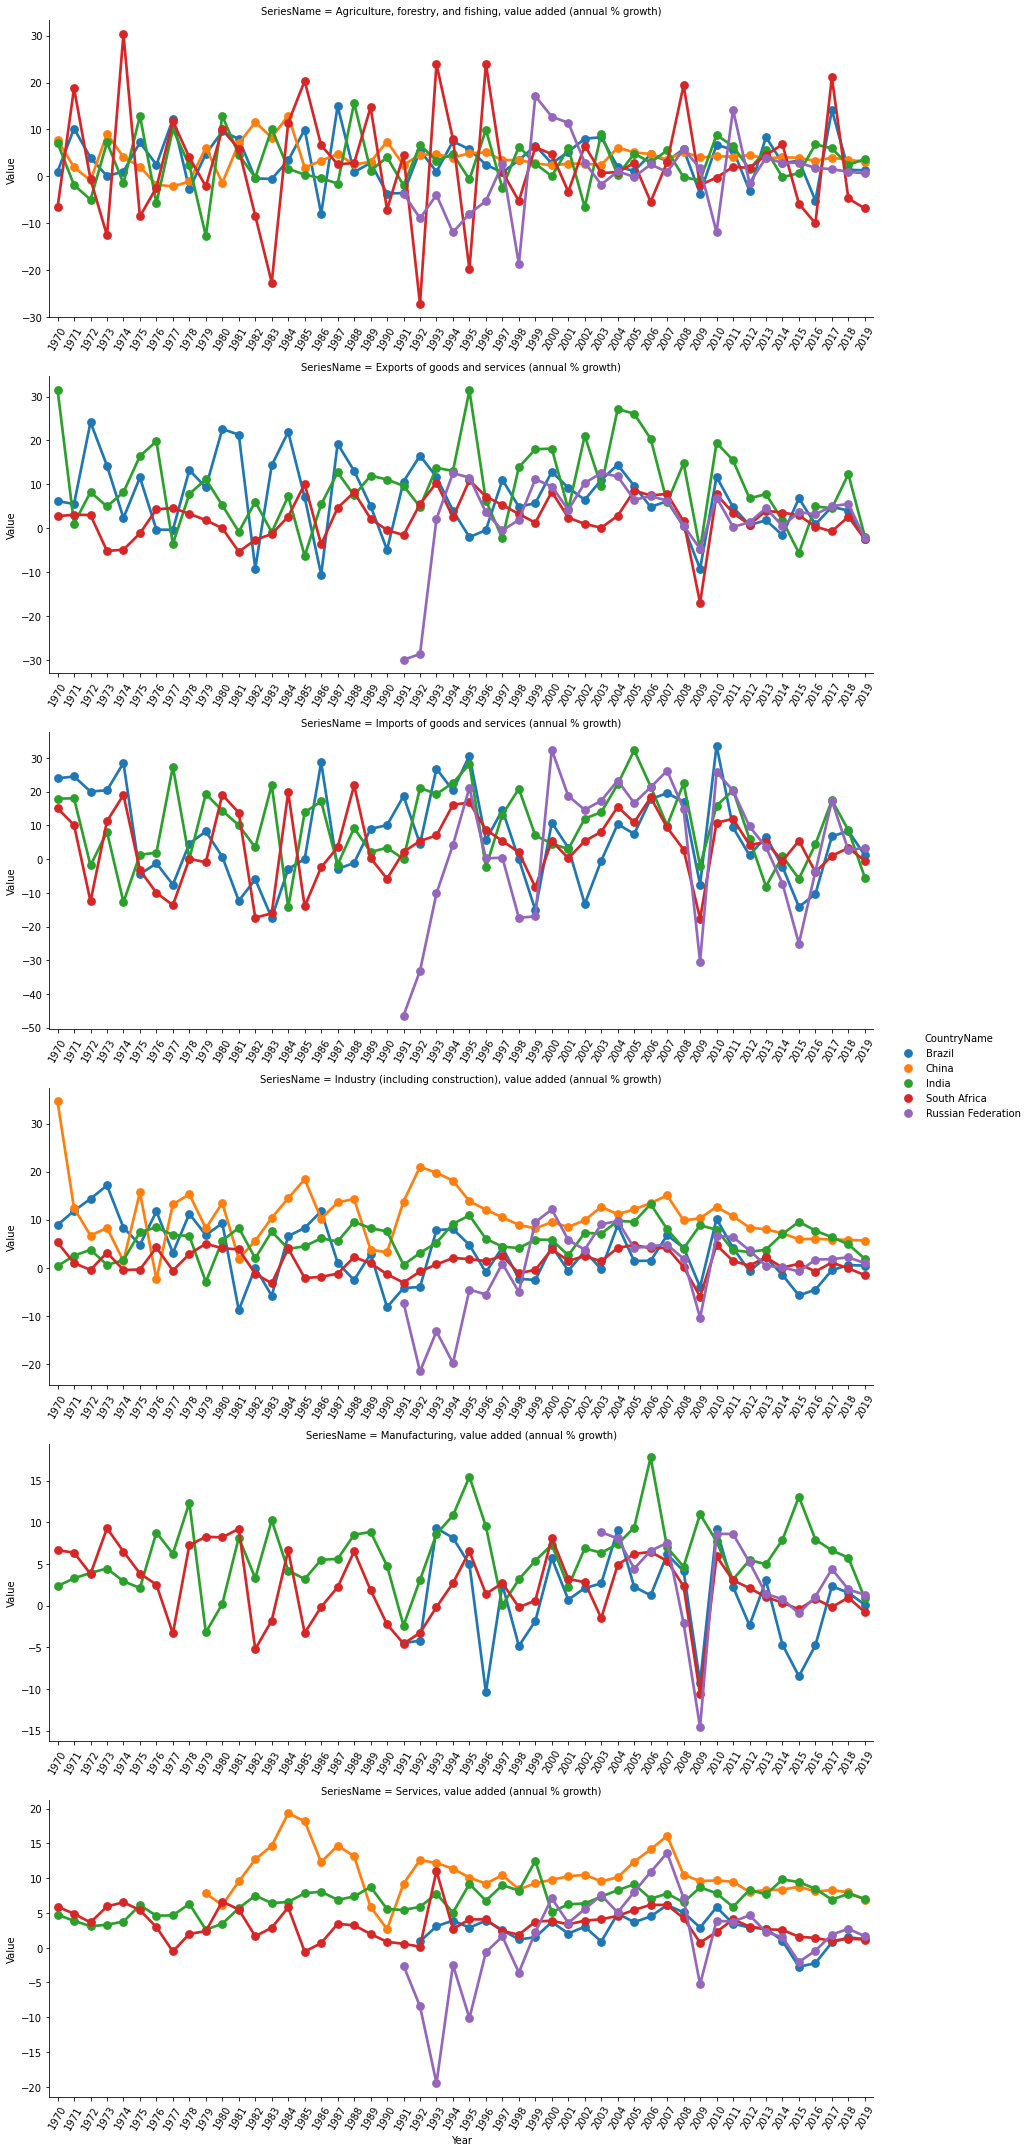

In [9]:
growth = ['Agriculture, forestry, and fishing, value added (annual % growth)',
          'Exports of goods and services (annual % growth)',
          'Imports of goods and services (annual % growth)',
          'Industry (including construction), value added (annual % growth)',
          'Manufacturing, value added (annual % growth)',
          'Services, value added (annual % growth)',
          ]

industry_growth = eco[eco['SeriesName'].isin(growth)]
g = sns.factorplot(data= industry_growth, x='Year', y='Value', hue='CountryName', row='SeriesName',
                    sharex=False, sharey=False, height=5, aspect=2.5)
g.set_xticklabels(rotation=60)
g.tight_layout()

# Annual %growth in gdp and national income
- GDP
- GDP per capita
- National Income
- National income per capita

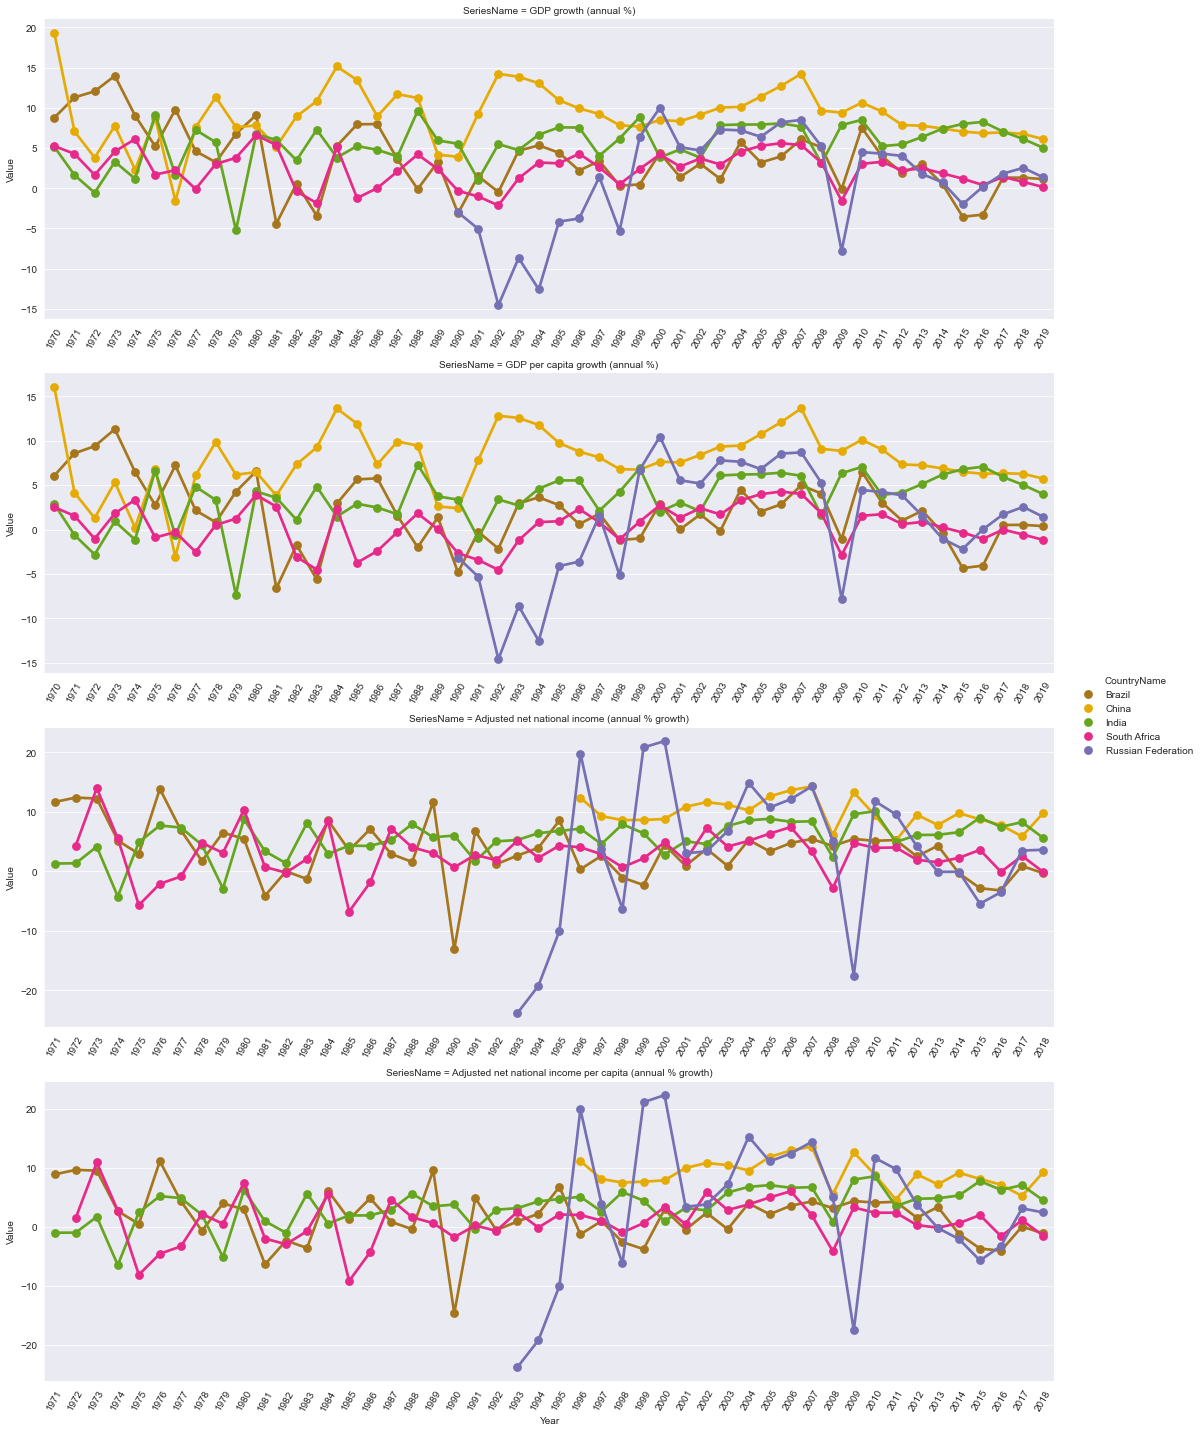

In [10]:
sns.set_palette('Dark2_r')
sns.set_style('darkgrid')
growth = ['Adjusted net national income (annual % growth)',
          'Adjusted net national income per capita (annual % growth)',
          'GDP growth (annual %)',
          'GDP per capita growth (annual %)']

gdp_growth = eco[eco['SeriesName'].isin(growth)]
g = sns.factorplot(data= gdp_growth, x='Year', y='Value', hue='CountryName', row='SeriesName',
               sharex=False, sharey=False, height=5, aspect=3)
g.set_xticklabels(rotation=60)
g.tight_layout()


# Net National Income and GDP growth
Analysing the relationship between the GDP and Net national income

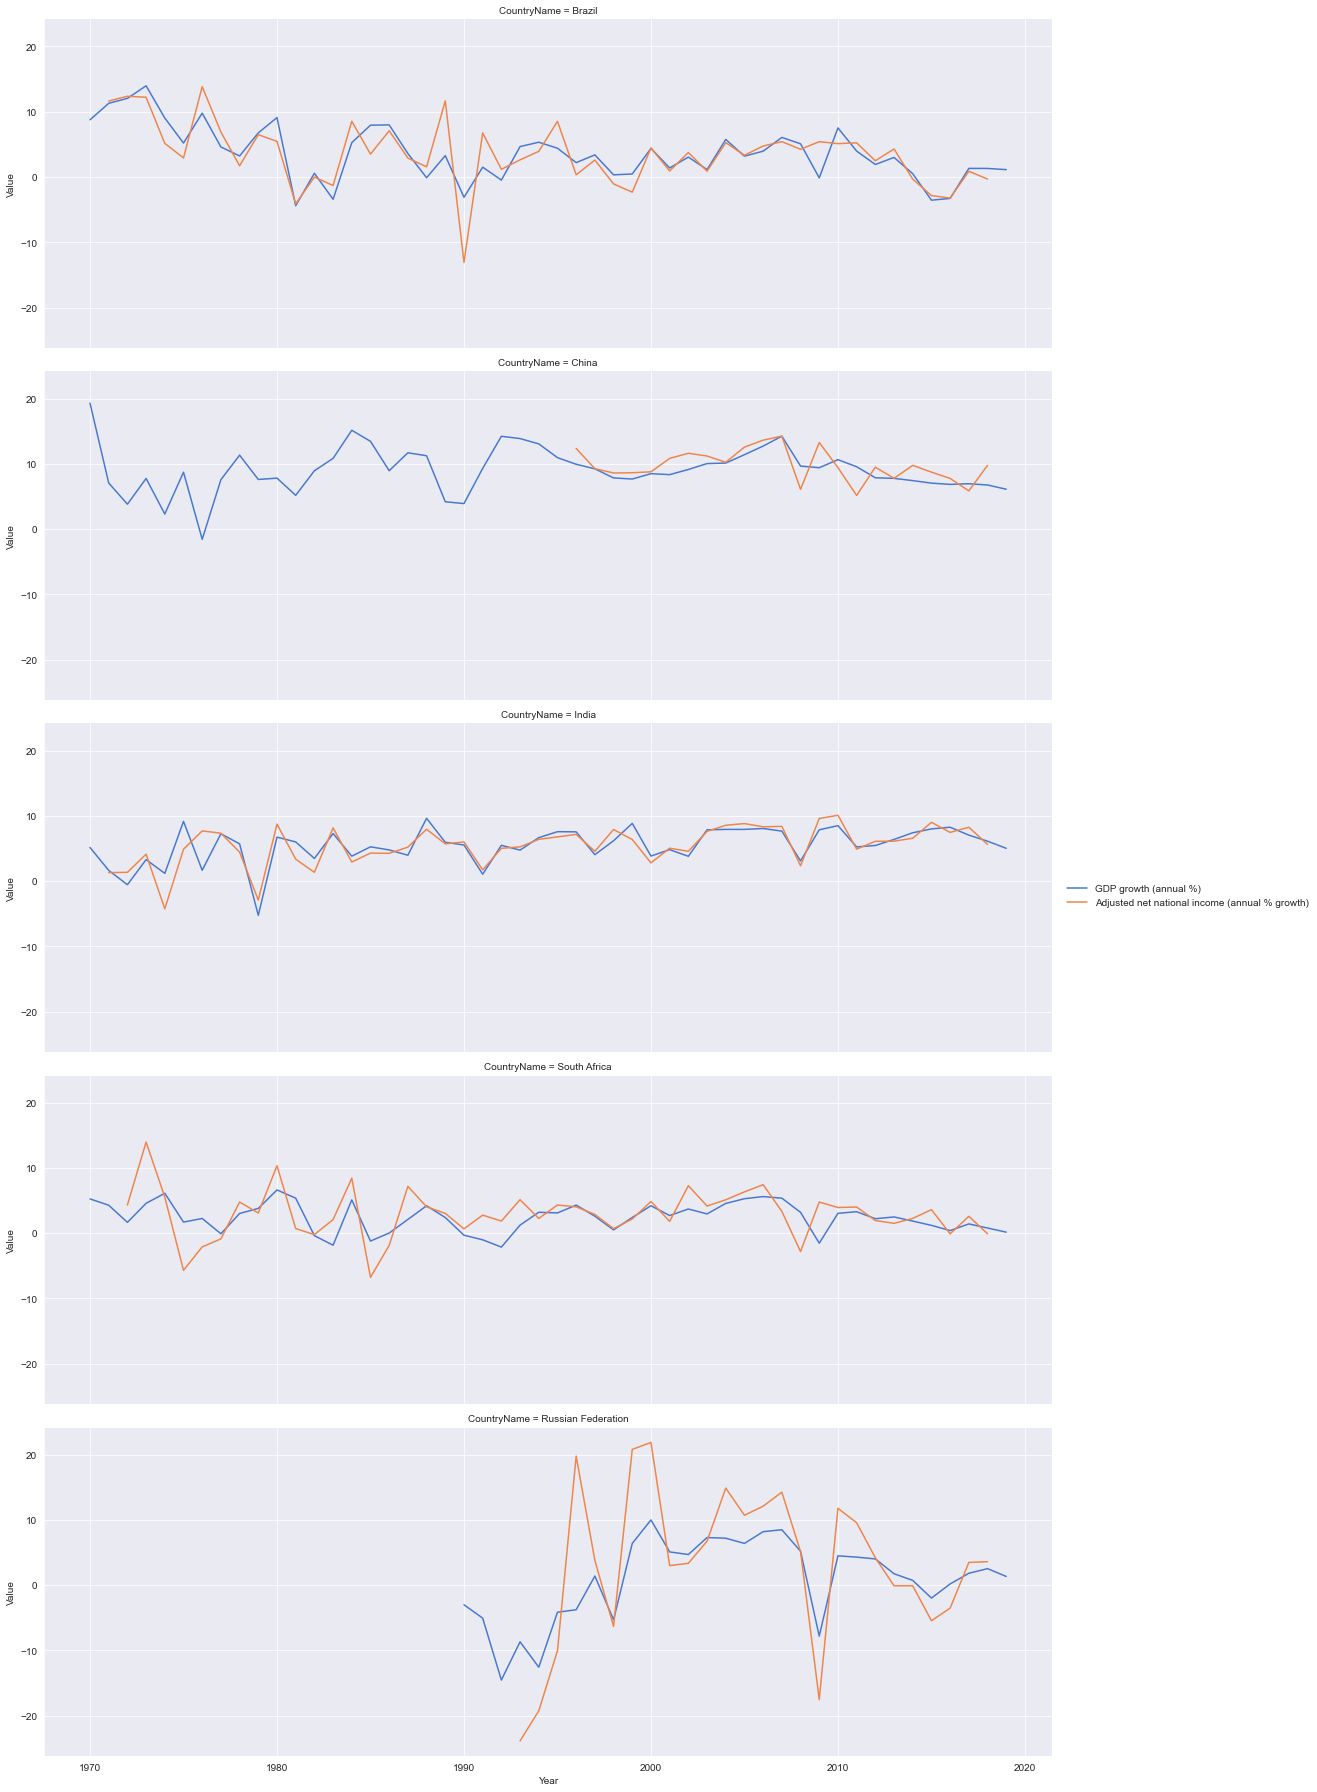

In [11]:
sns.set_style('darkgrid')
sns.set_palette('muted')
b = eco[(eco['SeriesName'] == 'Adjusted net national income (annual % growth)') | (
    eco['SeriesName'] == 'GDP growth (annual %)')]
g = sns.FacetGrid(data=b, row='CountryName', height=5, aspect=3)
g.map(sns.lineplot, 'Year','Value','SeriesName')
g.add_legend()


# Expenditure
- Education expenditure
- Gross expenditure
at current US$

In [12]:
#eco[eco['SeriesName'].str.contains('expenditure', case=False)]['SeriesName'].unique()

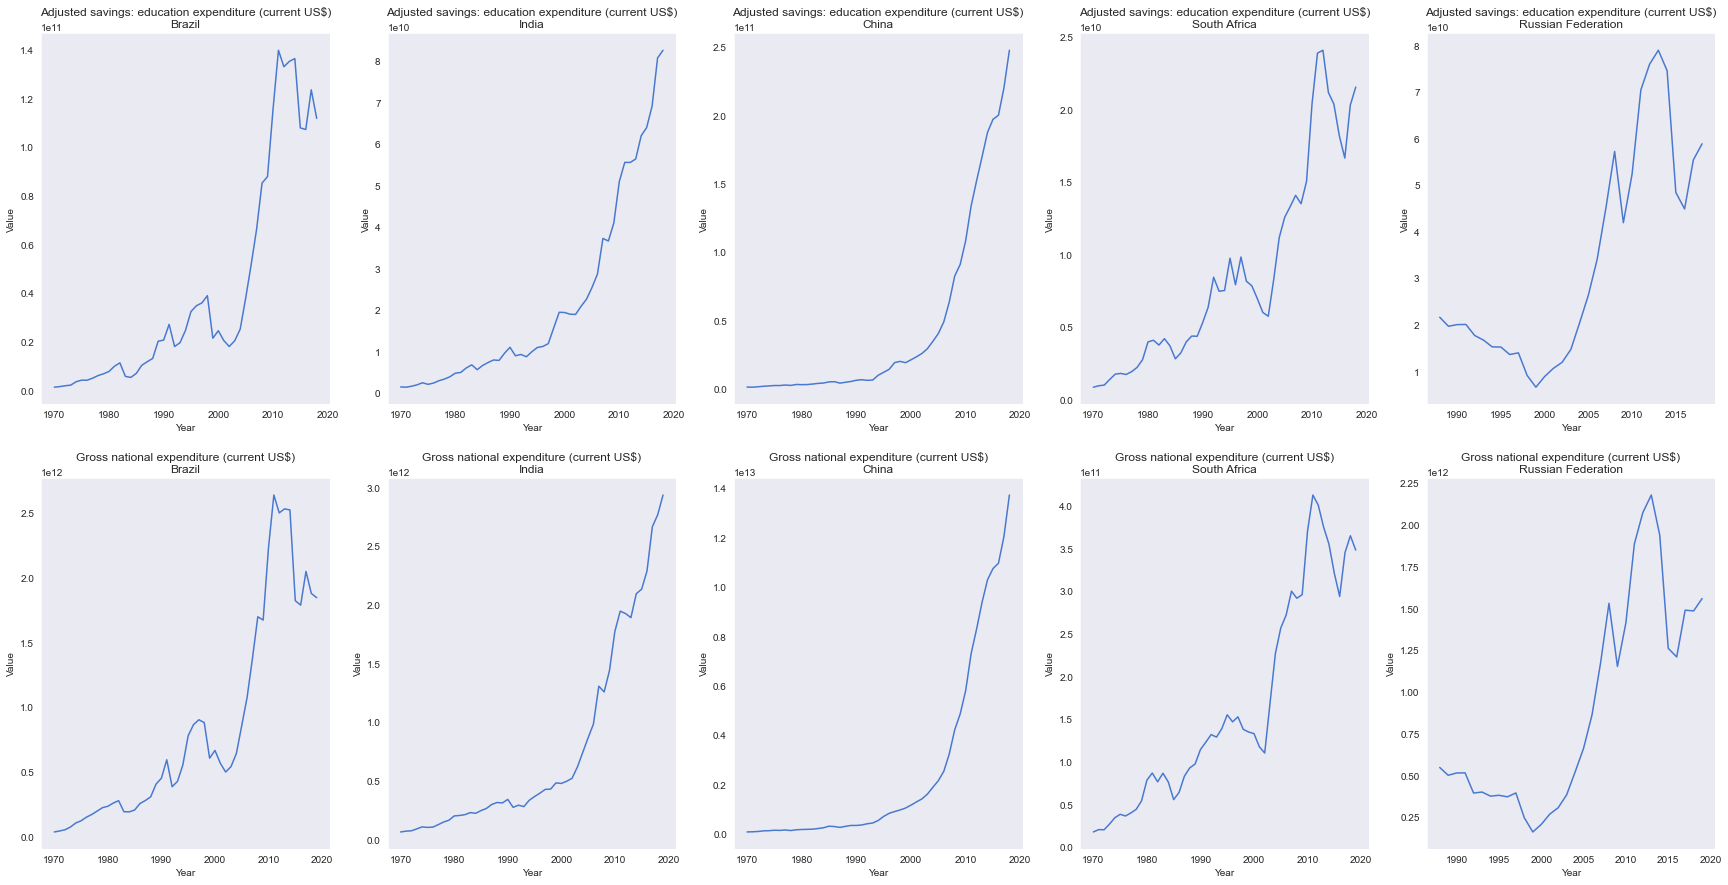

In [13]:
expend = ['Adjusted savings: education expenditure (current US$)',
         'Gross national expenditure (current US$)']
countries = ['Brazil', 'India', 'China', 'South Africa', 'Russian Federation']
sns.set_style('dark')
fig,axs = plt.subplots(nrows=2, ncols=5, figsize=(30,15))
for i, series in enumerate(expend):
    for j, country in enumerate(countries):
        a = eco[eco.SeriesName==series]
        a = a[a.CountryName == country]
        sns.lineplot(data=a, x='Year', y='Value', ax = axs[i,j]).set_title(f'{series}\n{country}')


# Share in GDP
How contributions to gdp changed for different sectors over the years.  
Contributions taken at 10 year intervals
Major contributers that are considered:
- Agriculture, forestry, and fishing
- Exports of goods and services
- Manufacturing
- Trade 
- Trade in services


In [14]:
eco[eco['SeriesName'].str.contains('% of gdp', case=False)]['SeriesName'].unique()

array(['Agriculture, forestry, and fishing, value added (% of GDP)',
       'Current account balance (% of GDP)',
       'Exports of goods and services (% of GDP)',
       'External balance on goods and services (% of GDP)',
       'Final consumption expenditure (% of GDP)',
       'Foreign direct investment, net inflows (% of GDP)',
       'Foreign direct investment, net outflows (% of GDP)',
       'General government final consumption expenditure (% of GDP)',
       'Gross capital formation (% of GDP)',
       'Gross domestic savings (% of GDP)',
       'Gross fixed capital formation (% of GDP)',
       'Gross fixed capital formation, private sector (% of GDP)',
       'Gross national expenditure (% of GDP)',
       'Gross savings (% of GDP)',
       'Households and NPISHs final consumption expenditure (% of GDP)',
       'Imports of goods and services (% of GDP)',
       'Industry (including construction), value added (% of GDP)',
       'Manufacturing, value added (% of GDP)',
   

In [15]:
gdp_contri = ['Agriculture, forestry, and fishing, value added (% of GDP)',
              'Exports of goods and services (% of GDP)',
              'Manufacturing, value added (% of GDP)',
              'Trade in services (% of GDP)',
              'Trade (% of GDP)']
gdp = eco[(eco['SeriesName'].isin(gdp_contri)) & (eco['Year']%10==0)]
gdp.sample(10)

,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
70899,Trade in services (% of GDP),BG.GSR.NFSV.GD.ZS,South Africa,ZAF,2010,9.499014
144,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,South Africa,ZAF,1970,6.757373
69462,Exports of goods and services (% of GDP),NE.EXP.GNFS.ZS,India,IND,2010,22.400933
36290,Trade (% of GDP),NE.TRD.GNFS.ZS,Brazil,BRA,1990,15.161756
53597,Trade in services (% of GDP),BG.GSR.NFSV.GD.ZS,India,IND,2000,7.658720
17561,Exports of goods and services (% of GDP),NE.EXP.GNFS.ZS,China,CHN,1980,5.911612
36299,Trade in services (% of GDP),BG.GSR.NFSV.GD.ZS,South Africa,ZAF,1990,6.279982
34864,Exports of goods and services (% of GDP),NE.EXP.GNFS.ZS,South Africa,ZAF,1990,23.494921
17560,Exports of goods and services (% of GDP),NE.EXP.GNFS.ZS,Brazil,BRA,1980,9.052730
36295,Trade in services (% of GDP),BG.GSR.NFSV.GD.ZS,Brazil,BRA,1990,2.442896


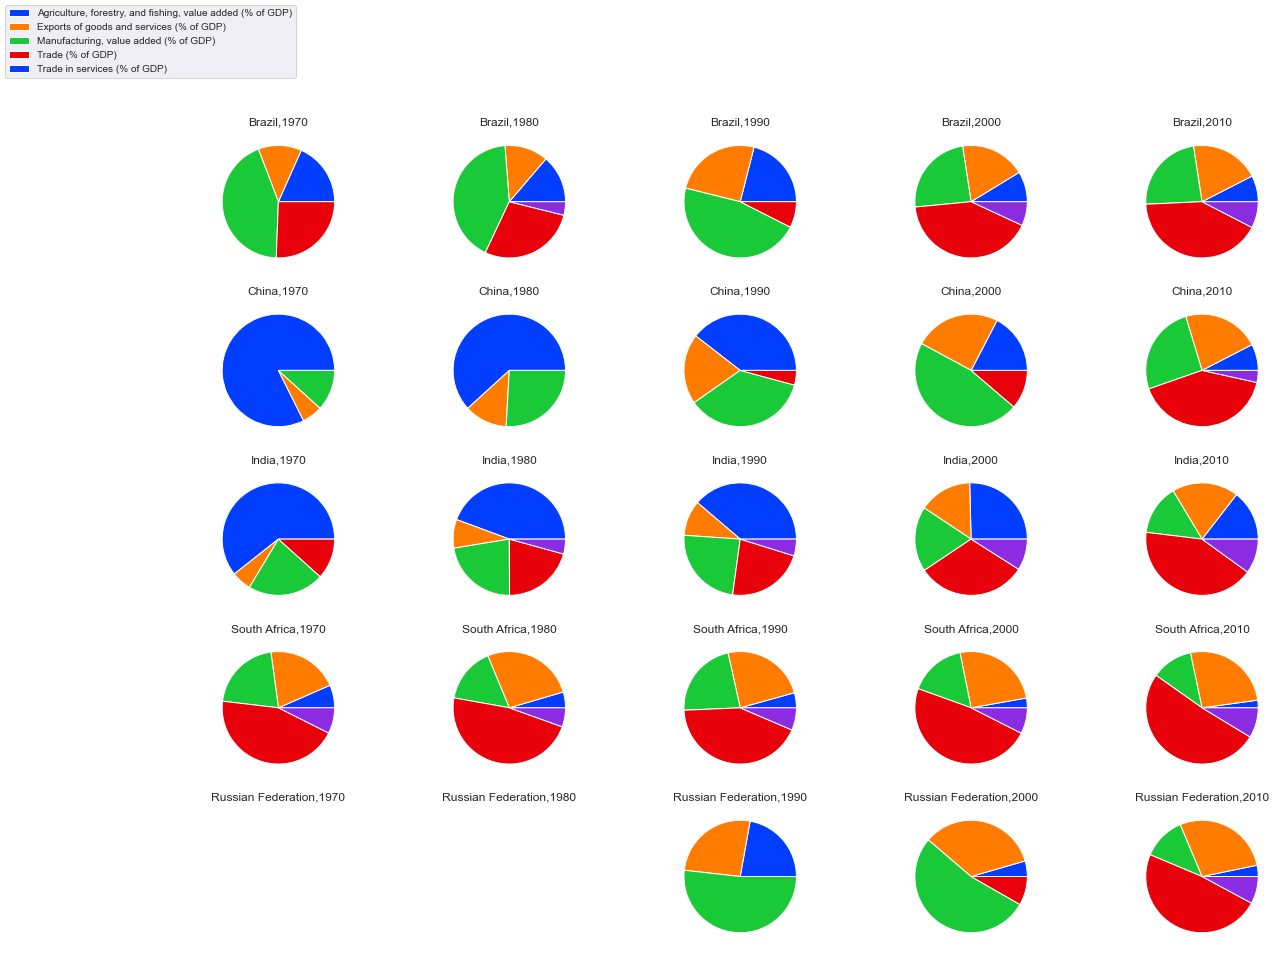

In [16]:
sns.set_palette('bright')
fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(20,15))
for i, country in enumerate(gdp['CountryName'].unique()):
    for j, year in enumerate(gdp['Year'].unique()):
        a = gdp[gdp['CountryName']==country] 
        a = a[a['Year']==year]
        axs[i,j].pie(x=a['Value'], normalize=True)
        axs[i,j].set_title(f'{country},{year}')
        axs[i,j].set_facecolor('White')
fig.legend(labels= a['SeriesName'], loc='upper left')

# Aid from United Nations Agencies.
Net official flows from the following UN agescies at current US$:
- UNDP
- UNHCR
- UNICEF
- UNTA
- WFP

In [17]:
def agency(x):
    if 'UNDP' in x:
        return 'UNDP'
    elif 'UNHCR' in x:
        return 'UNHCR'
    elif 'UNICEF' in x:
        return 'UNICEF'
    elif 'UNTA' in x:
        return 'UNTA'
    elif 'WFP' in x:
        return 'WFP'
    else:
        return('NA')


aid_from_un = ['Net official flows from UN agencies, UNDP (current US$)',
               'Net official flows from UN agencies, UNHCR (current US$)',
               'Net official flows from UN agencies, UNICEF (current US$)',
               'Net official flows from UN agencies, UNTA (current US$)',
               'Net official flows from UN agencies, WFP (current US$)', ]
aid = eco[eco['SeriesName'].isin(aid_from_un)]
aid['Agency'] = aid['SeriesName'].apply(lambda x: agency(x))

aid.head()


,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value,Agency
1310,"Net official flows from UN agencies, UNDP (cur...",DT.NFL.UNDP.CD,Brazil,BRA,1970,3.470000e+06,UNDP
1312,"Net official flows from UN agencies, UNDP (cur...",DT.NFL.UNDP.CD,India,IND,1970,6.760000e+06,UNDP
1332,"Net official flows from UN agencies, UNHCR (cu...",DT.NFL.UNCR.CD,India,IND,1970,3.100000e+05,UNHCR
1335,"Net official flows from UN agencies, UNICEF (c...",DT.NFL.UNCF.CD,Brazil,BRA,1970,7.200000e+05,UNICEF
1337,"Net official flows from UN agencies, UNICEF (c...",DT.NFL.UNCF.CD,India,IND,1970,6.690000e+06,UNICEF


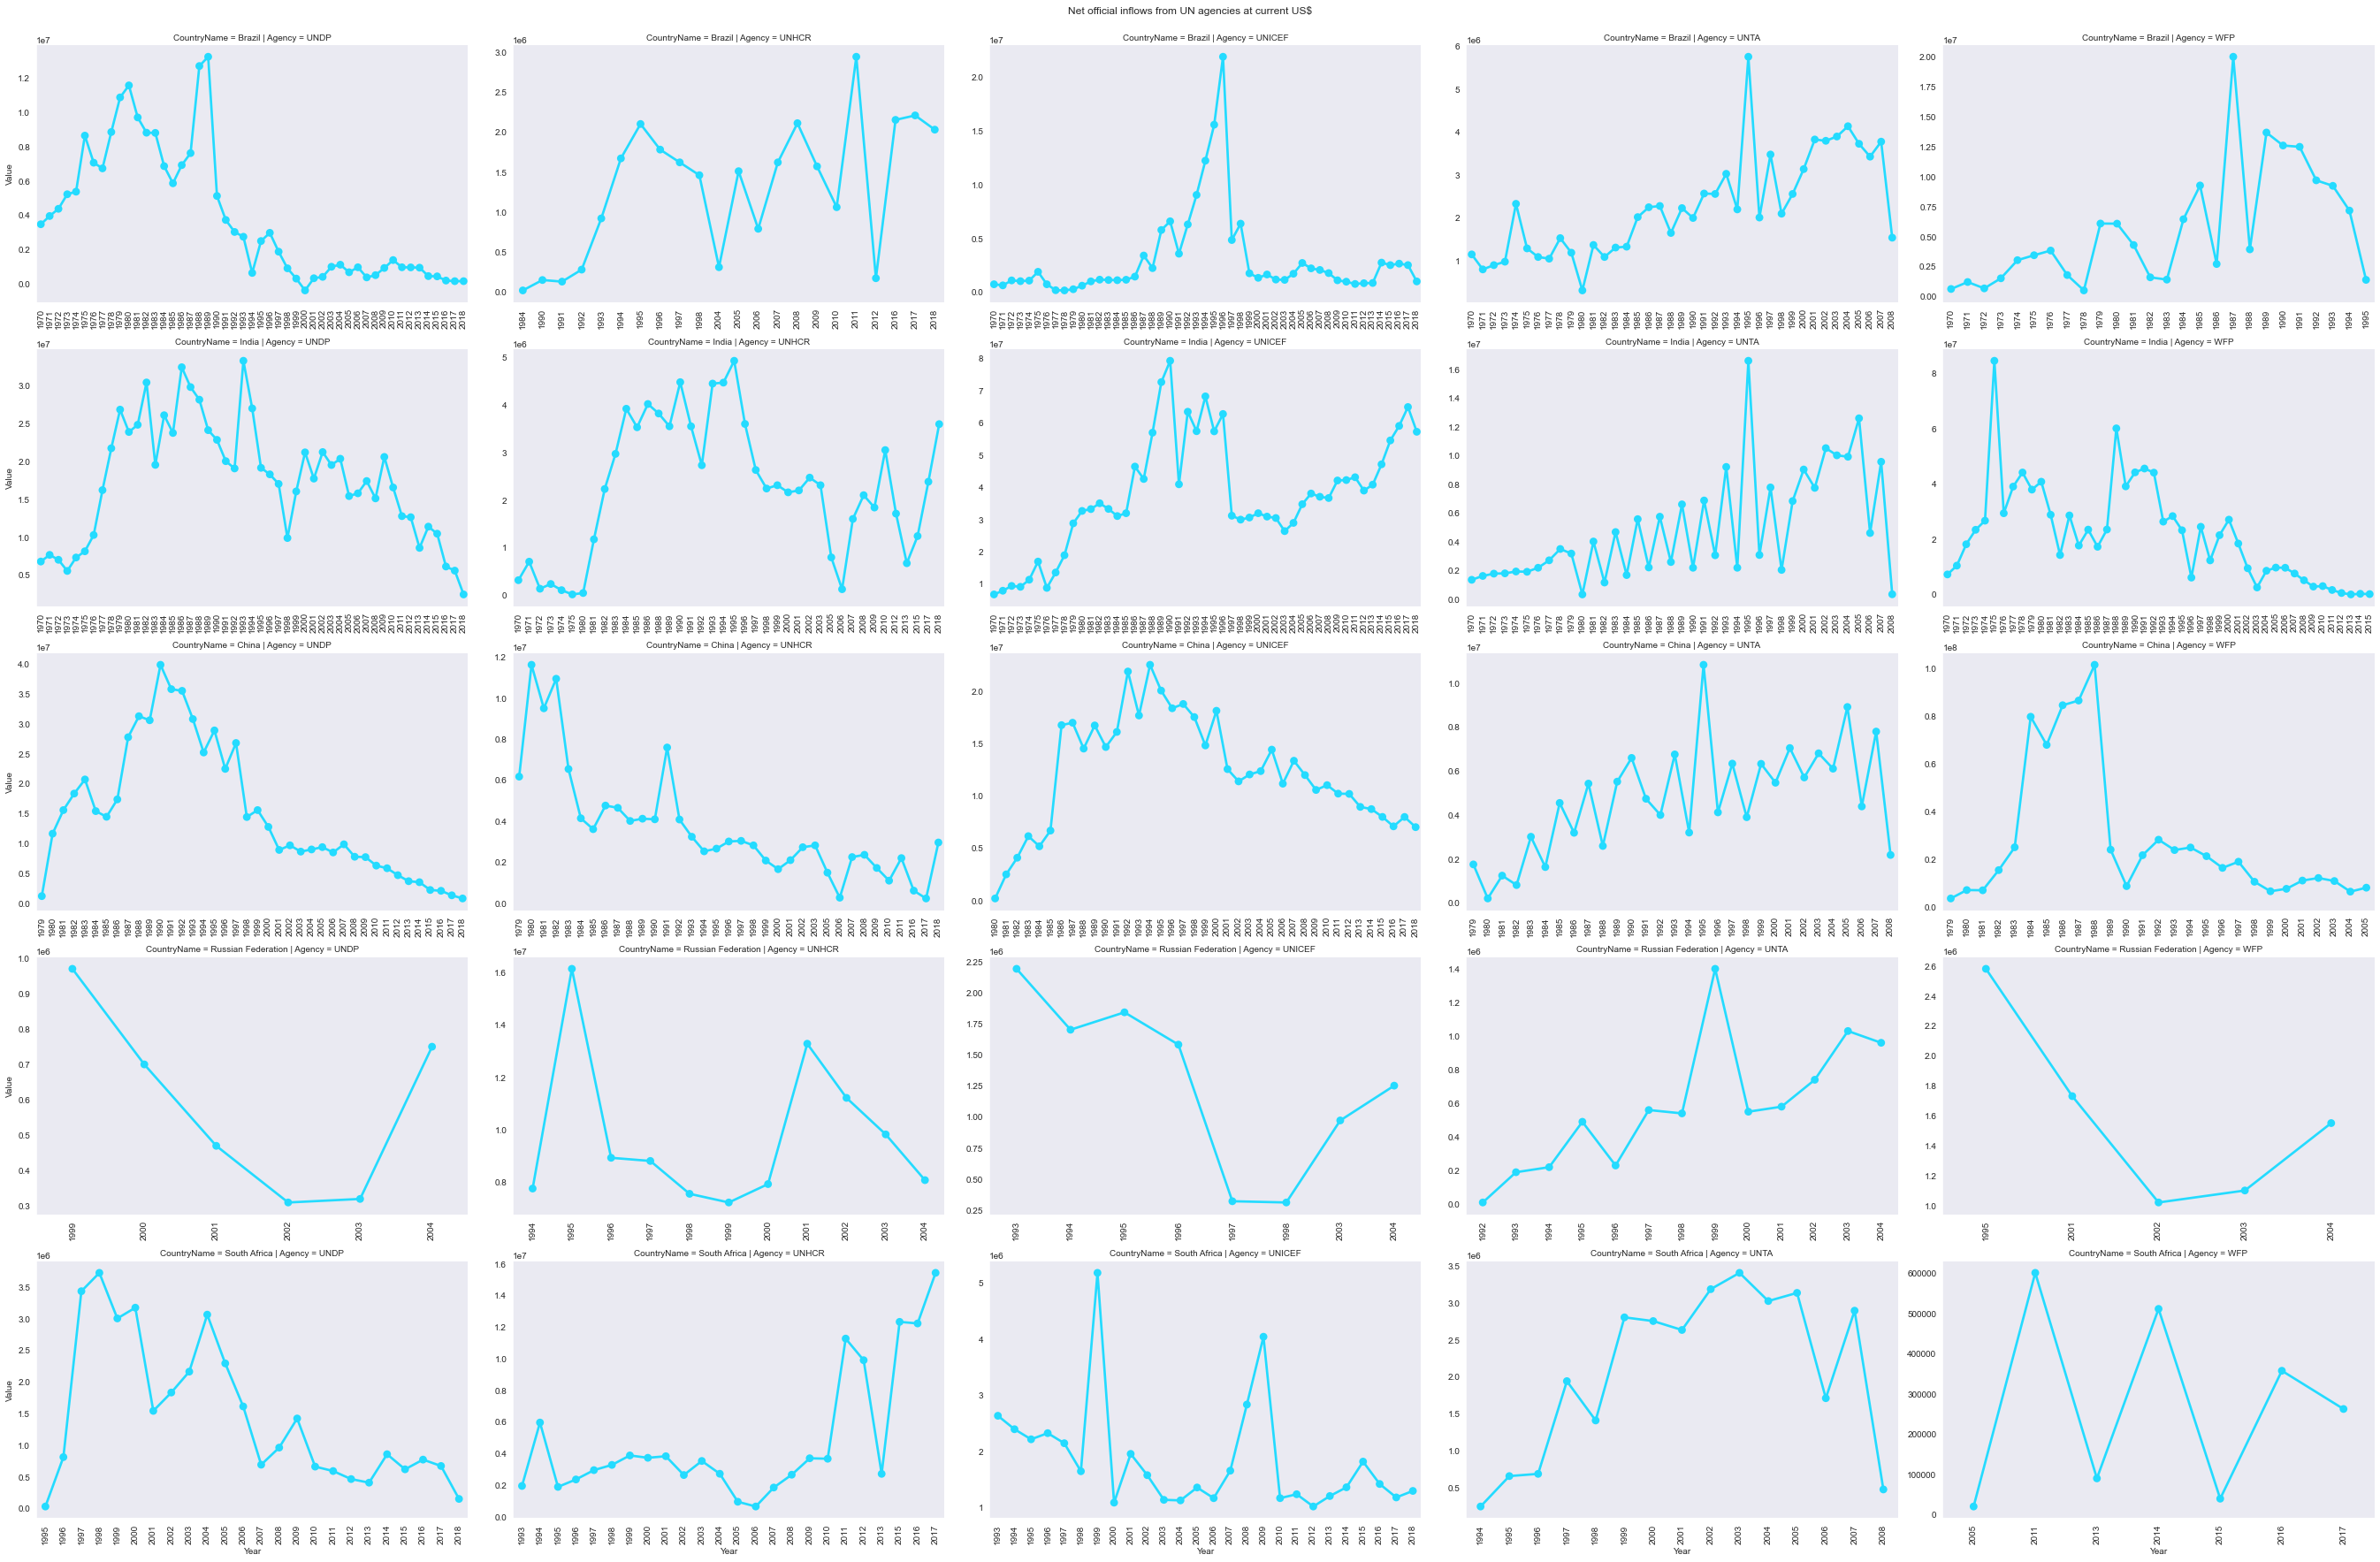

In [18]:
sns.set_palette('cool')
g = sns.factorplot(data=aid, x='Year', y='Value', row='CountryName', col='Agency',
                   sharex=False, sharey=False, height=5, aspect=1.5)
g.fig.suptitle('Net official inflows from UN agencies at current US$\n\n\n')
g.set_xticklabels(rotation=90)
g.tight_layout()


# Use of IMF credit

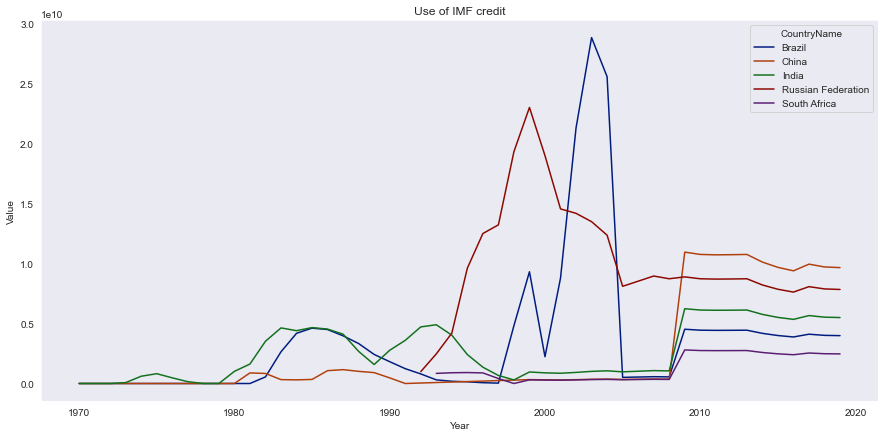

In [19]:
sns.set_palette('dark')
imf = eco[eco['SeriesName'] == 'Use of IMF credit (DOD, current US$)']
plt.figure(figsize=(15,7))
sns.lineplot(data=imf, x='Year', y='Value', hue='CountryName').set_title('Use of IMF credit')
plt.show()

